In [49]:
from hdrh.histogram import HdrHistogram
import seaborn as sns
import pandas
from matplotlib import pyplot as plt
import os.path
import matplotlib as mpl
from typing import *


MIN_LATENCY_USEC = 1
MAX_LATENCY_USEC = 1000*1000 # 1 sec
LATENCY_SIGNIFICANT_DIGITS = 5

BENCHS = {
    'lusearch': 'lusearch.3023.70',
    'cassandra': 'cassandra.3023.269',
    'h2': 'h2.3023.3489',
    'tomcat': 'tomcat.3023.76',
}

log = lambda runid, buildstring: f'/home/wenyuz/MMTk-Dev/evaluation/results/log/{runid}/{buildstring}'

# Pause time curve

In [50]:
MIN_PAUSE_USEC = 1
MAX_PAUSE_USEC = 1000*1000 # 1 sec
PAUSE_SIGNIFICANT_DIGITS = 5

def load_phase_time_data(invocation, folder):
    path = "{}.{}/pauses.csv".format(folder, invocation)
    if not os.path.isfile(path):
        return None
    names = ['total', 'wait', 'init', 'prepare', 'closure', 'refclosure', 'refforwarding', 'release']
    df = pandas.read_csv(path, names=[*names, 'copy', 'incs'])
    for name in names:
        df[name] = df[name] / 1000
    df['pause (ms)'] = df['total']
    return df

def plot_scatter(bench, title, x, y, data: Union[str, List[str]], invocations = 10, save = None, ax=None):
    dfs = []
    for i in range(invocations):
        folders = data if isinstance(data, list) else [data]
        for folder in folders:
            df = load_phase_time_data(i, folder)
            if data is not None:
                dfs.append(df)
    df = pandas.concat(dfs)
    if ax is not None: ax.title.set_text(title)
    df.plot.scatter(x=x, y=y, c='DarkBlue', ax=ax)

def plot_scatter_for_bench(bench, data: Union[str, List[str]], invocations=20):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
    ax1.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: f'{x / 1000:.1f}'.format(x)))
    ax2.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: f'{x / 1000:.1f}'.format(x)))
    plot_scatter(
        bench = bench,
        ax=ax1,
        title = 'Copy bytes',
        x = 'copy',
        y = 'pause (ms)',
        data = data,
        invocations = invocations,
    )
    plot_scatter(
        bench = bench,
        ax=ax2,
        title = 'Increments',
        x = 'incs',
        y = 'pause (ms)',
        data = data,
        invocations = invocations,
    )



## lusearch

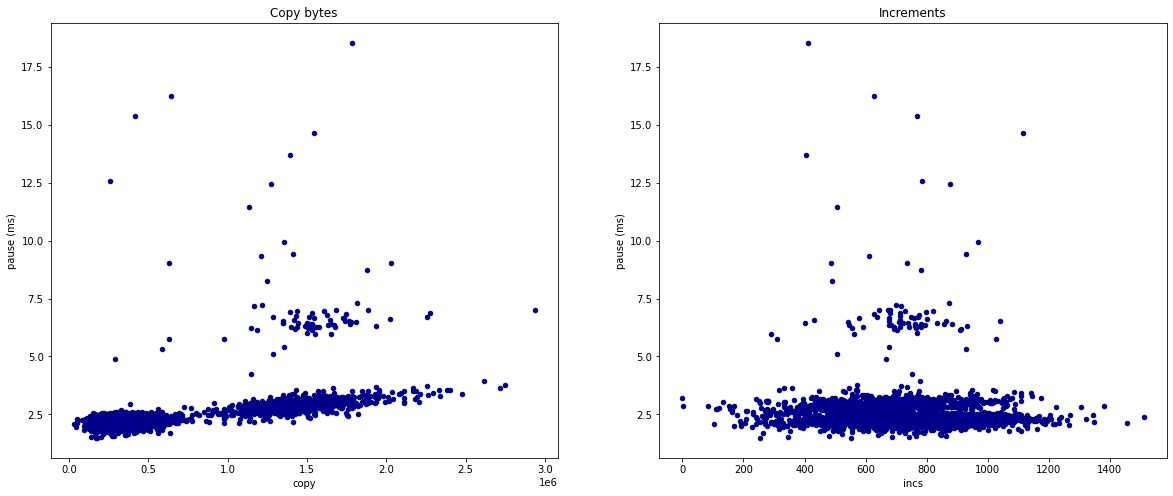

In [51]:
BENCH = 'lusearch'

runid1 = 'elk-2021-12-06-Mon-034358'

plot_scatter_for_bench(BENCH, log(runid1, f'{BENCHS[BENCH]}.jdk.ix.common.tph.mmtk_perf.nr-1.dacapochopin-29a657f'))

## cassandra

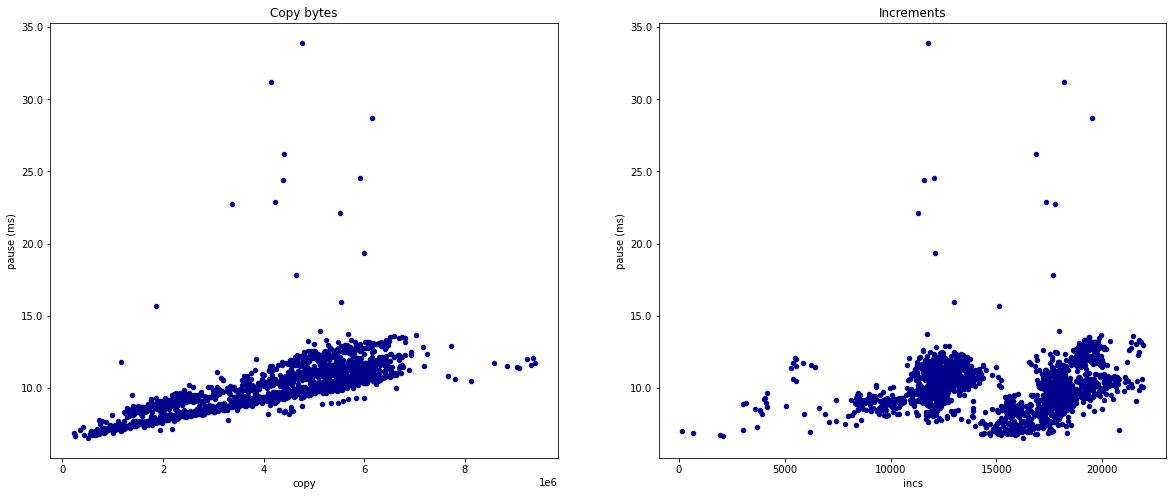

In [52]:
BENCH = 'cassandra'

runid1 = 'elk-2021-12-06-Mon-034358'

plot_scatter_for_bench(BENCH, log(runid1, f'{BENCHS[BENCH]}.jdk.ix.common.tph.mmtk_perf.nr-1.dacapochopin-29a657f'))

## h2

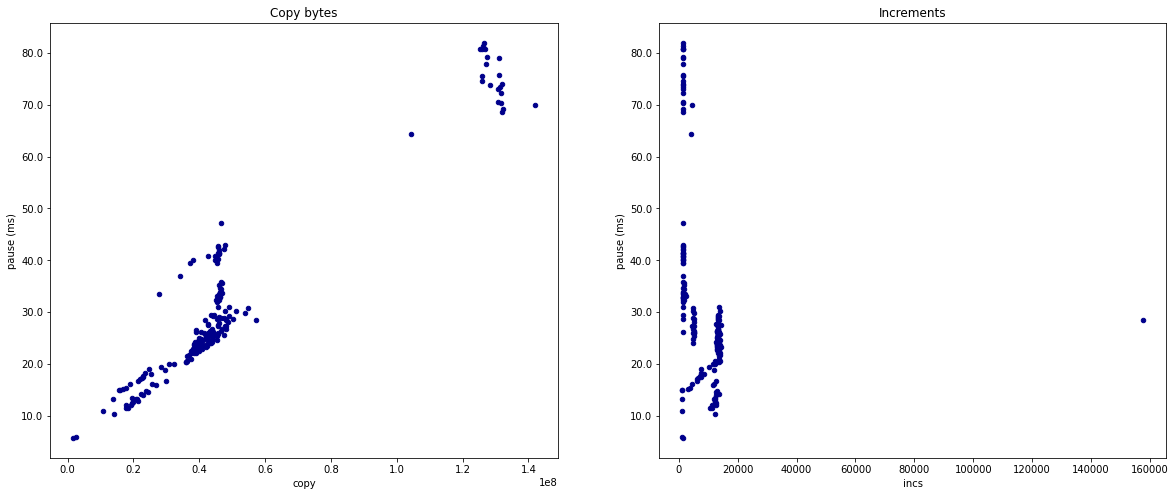

In [53]:
BENCH = 'h2'

runid1 = 'elk-2021-12-06-Mon-034358'

plot_scatter_for_bench(BENCH, log(runid1, f'{BENCHS[BENCH]}.jdk.ix.common.tph.mmtk_perf.nr-1.dacapochopin-29a657f'))

## tomcat

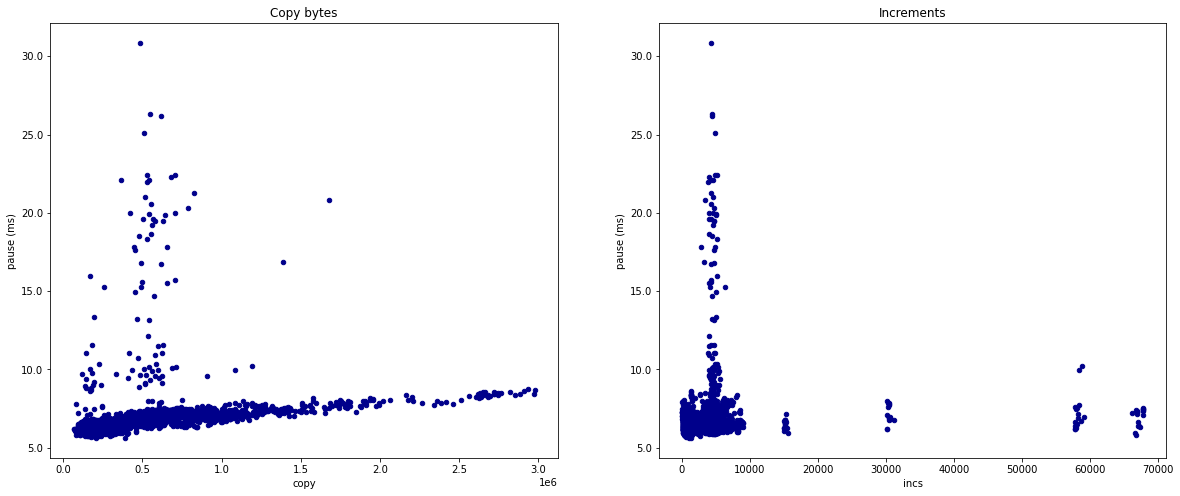

In [54]:
BENCH = 'tomcat'

runid1 = 'elk-2021-12-06-Mon-034358'

plot_scatter_for_bench(BENCH, log(runid1, f'{BENCHS[BENCH]}.jdk.ix.common.tph.mmtk_perf.nr-1.dacapochopin-29a657f'))